
# Hotel bookings

In this labo, we will exercice cleaning data on a dataset called 'Hotel Bookings'. The Hotel Booking demand dataset contains booking information for a city hotel and a resort hotel. It includes information such as booking time, length of stay, number of adults, children/babies, number of available parking spaces, among other things.
The City Hotel from this dataset asked us to predict which clients will cancel. We will do the prediction in a later labo.

Some of the code is already given. If you see any '...', then you need to add the right code yourself. Towards the end of the labo, less and less of the code will be given in advance and you will have to completely write the code yourself. If you get stuck, take a look at the code in the demo.

## 0. Loading packages and dataset

In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\3818186681.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [80]:
df = pd.read_csv('hotel_bookings.csv')

## 1. Data exploration

## a) The basics
First, you have to explore the data. Find out the following things:
1. Number of features
2. Number of observations
3. The different datatypes that can be found in the dataset + the number of features per datatype
4. The number of features that have missing data
5. The amount of missing data for the features that have missing data


1. and 2: number of features and observations

In [81]:
df.shape

(119390, 32)

3. Datatypes

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

4. and 5. Missing data

In [111]:
df.isnull().sum()[df.isnull().sum() != 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

or in percentages:

In [112]:
(119390-df.isnull().sum()[df.isnull().sum() != 0])/119390*100

children    99.996650
country     99.591256
agent       86.313762
company      5.693107
dtype: float64

## b) Look at the data
Look at the first 5 rows of the data.You won't be able to see all features at once.
1. Do the columns and values make sense?
2. Look at the features.
    + Are there any features that are categorical, but not yet declared an object? If so, tell python.
3. There are dates in this dataset. We didn't see yet how to handle dates. 
    + If the dates are already split up into different features (day-month-year), these can be left as is (except for maybe making the months categorical)
    + If the full date is given in one feature
        + you have to first convert the feature type to a data, using pd.to_datetime(feature)
        + Then you have to extract the day, week, month  and year
            + feature.dt.year
            + feature.dt.month
            + feature.dt.week
            + feature.dt.day


1. Look at the data - does it make sense?

First take a look at feature 0 to 16

In [ ]:
df.iloc[:,0:16].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO


And then to feature 16 to 32

In [ ]:
df.iloc[:,16:32].head()

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


2. Convert categorical

In [ ]:

df['agent'] = df['agent'].astype('category')
df['company'] = df['company'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  object  
 1   is_canceled                     119390 non-null  int64   
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_month              119390 non-null  object  
 5   arrival_date_week_number        119390 non-null  int64   
 6   arrival_date_day_of_month       119390 non-null  int64   
 7   stays_in_weekend_nights         119390 non-null  int64   
 8   stays_in_week_nights            119390 non-null  int64   
 9   adults                          119390 non-null  int64   
 10  children                        119386 non-null  float64 
 11  babies                          119390 non-null  int64   
 12  me

3. Deal with features that are dates.

In [109]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [110]:
df['reservation_status_date_year'] = df['reservation_status_date'].dt.year
df['reservation_status_date_month'] = df['reservation_status_date'].dt.month
df['reservation_status_date_week'] = df['reservation_status_date'].dt.week
df['reservation_status_date_day'] = df['reservation_status_date'].dt.day
df = df.drop(['reservation_status_date'],1)
df.info()

C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\2623047395.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['reservation_status_date_week'] = df['reservation_status_date'].dt.week
C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\2623047395.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['reservation_status_date'],1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## c) Look at the descriptives
1. For which features do you suspect outliers?
2. Which of these outliers seem most suspicious? Which would you certainly check if you were able to?
3. For which years do you have an arrival date?
4. For which years do you have a reservation date?

First take a look at feature 0 to 18

In [ ]:
df.iloc[:,0:18].describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000


Then to feature 18 to 35

In [113]:
df.iloc[:,18:35].describe()

,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date_year,reservation_status_date_month,reservation_status_date_week,reservation_status_date_day
count,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016.093743,6.334123,25.899573,15.666639
std,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,0.715306,3.346352,14.746966,8.778432
min,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016.000000,3.000000,13.000000,8.000000
50%,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016.000000,6.000000,26.000000,16.000000
75%,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017.000000,9.000000,38.000000,23.000000
max,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017.000000,12.000000,53.000000,31.000000


## d) Plot the distributions
1. Make histograms for the numerical features
2. Make barplots for the categorical features: which features have sparse classes?

array([[<AxesSubplot: title={'center': 'is_canceled'}>,
        <AxesSubplot: title={'center': 'lead_time'}>,
        <AxesSubplot: title={'center': 'arrival_date_year'}>,
        <AxesSubplot: title={'center': 'arrival_date_week_number'}>],
       [<AxesSubplot: title={'center': 'arrival_date_day_of_month'}>,
        <AxesSubplot: title={'center': 'stays_in_weekend_nights'}>,
        <AxesSubplot: title={'center': 'stays_in_week_nights'}>,
        <AxesSubplot: title={'center': 'adults'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'babies'}>,
        <AxesSubplot: title={'center': 'is_repeated_guest'}>,
        <AxesSubplot: title={'center': 'previous_cancellations'}>],
       [<AxesSubplot: title={'center': 'previous_bookings_not_canceled'}>,
        <AxesSubplot: title={'center': 'booking_changes'}>,
        <AxesSubplot: title={'center': 'agent'}>,
        <AxesSubplot: title={'center': 'company'}>],
       [<AxesSubplot: title={'c

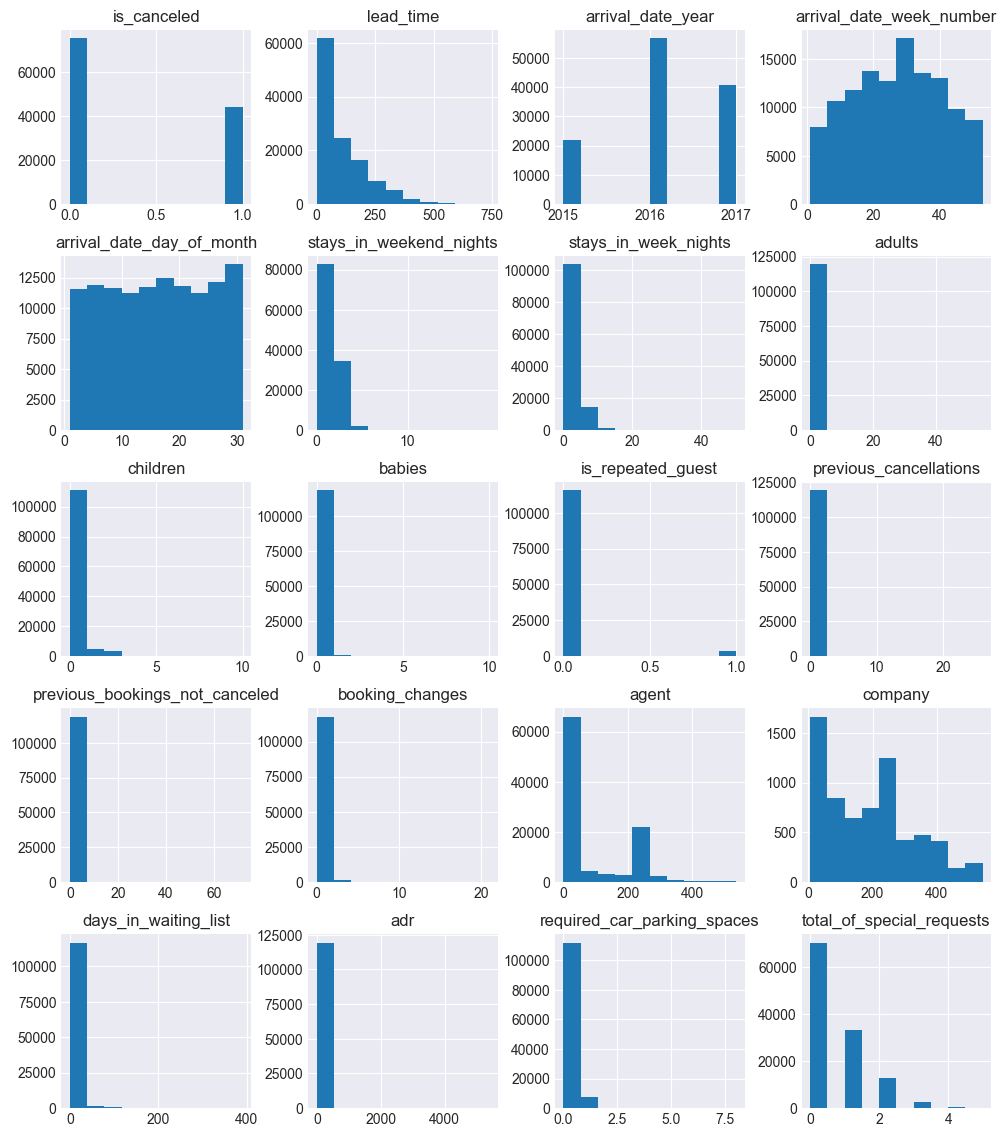

In [ ]:
df.hist( figsize = (12,14))

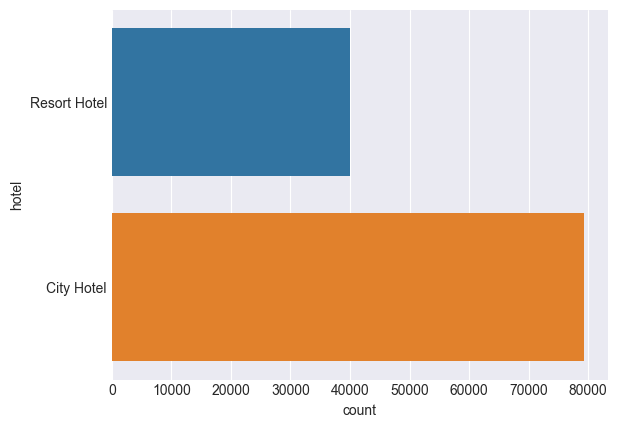

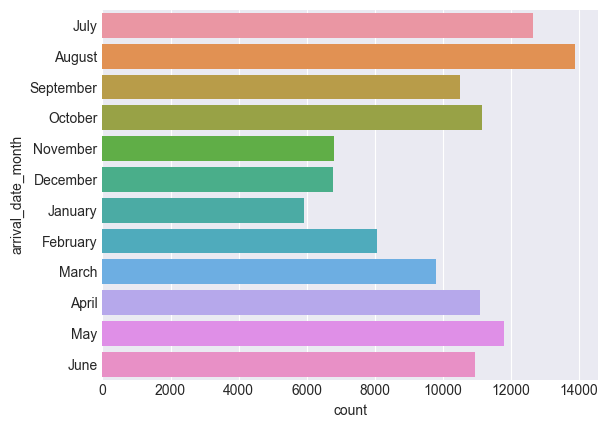

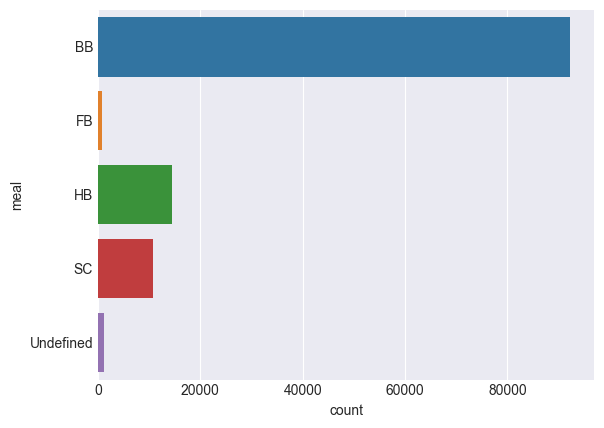

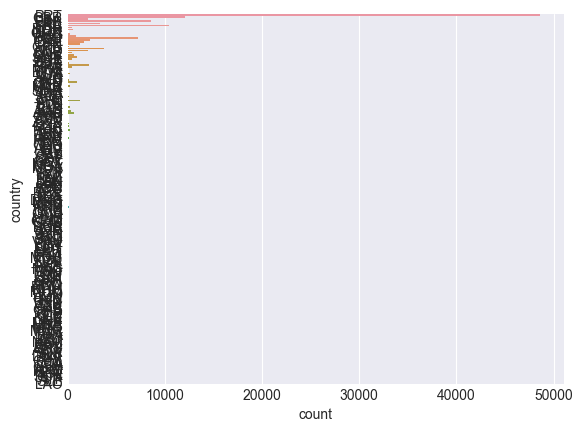

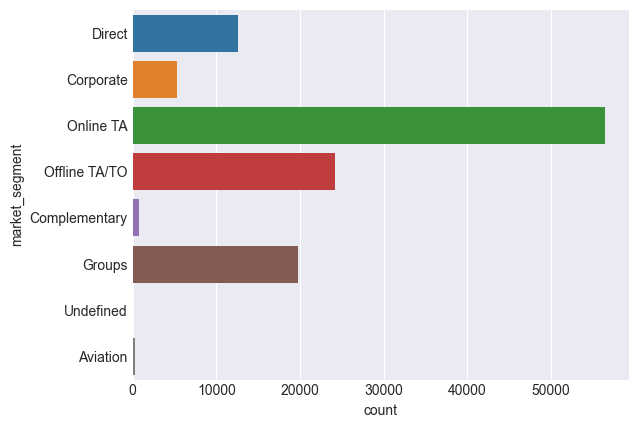

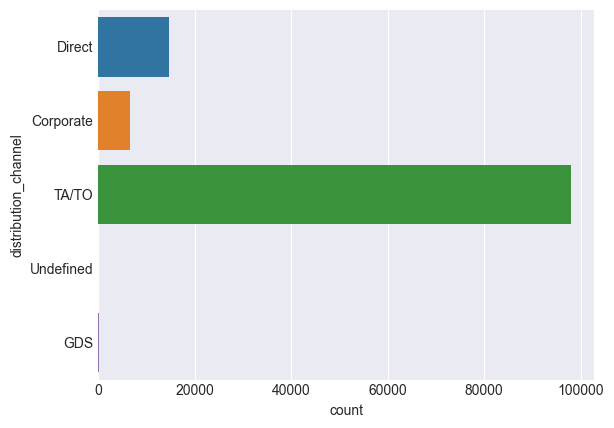

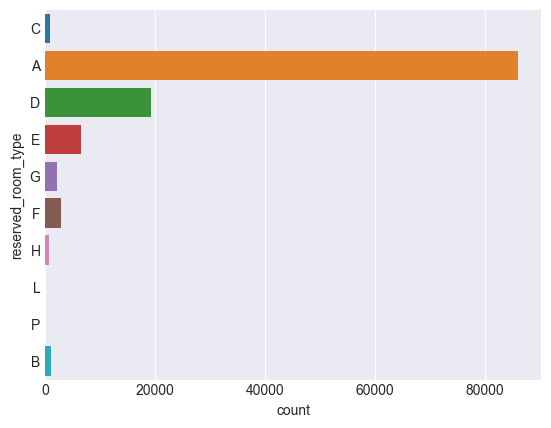

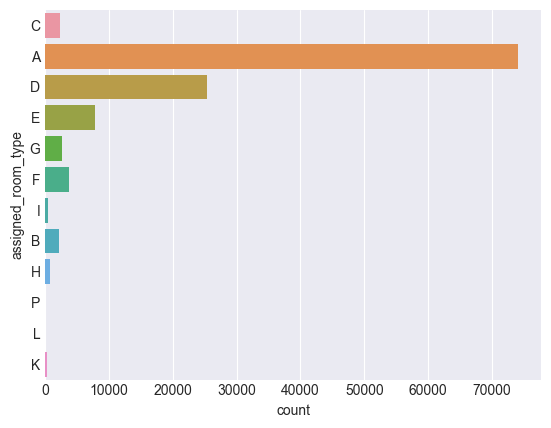

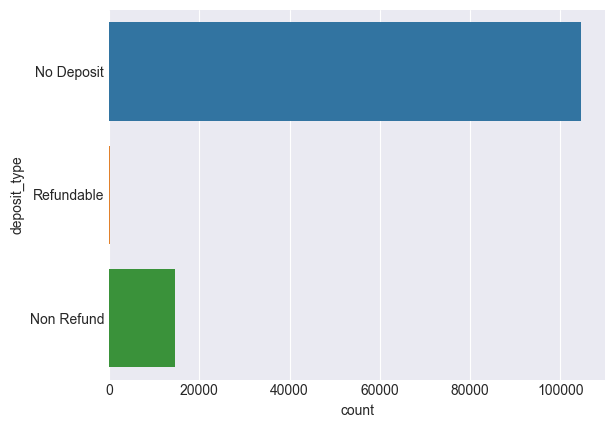

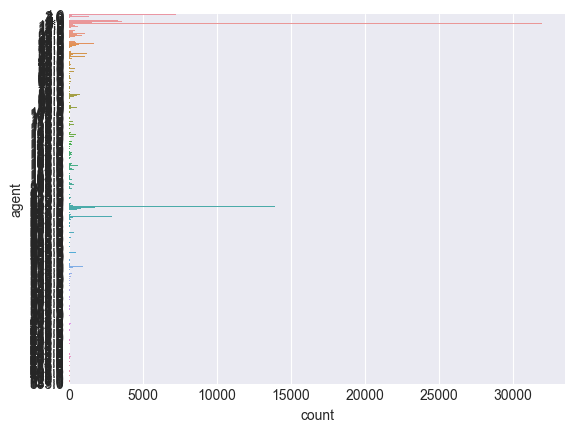

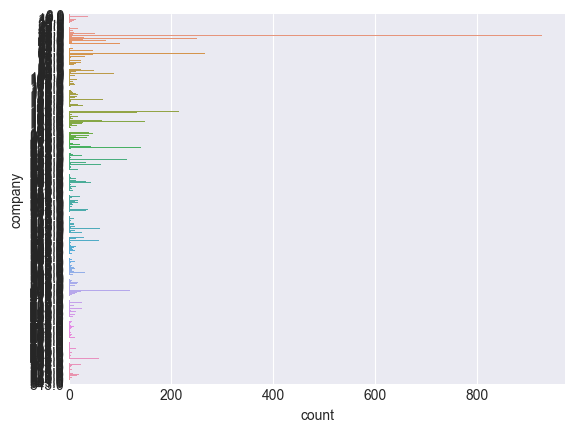

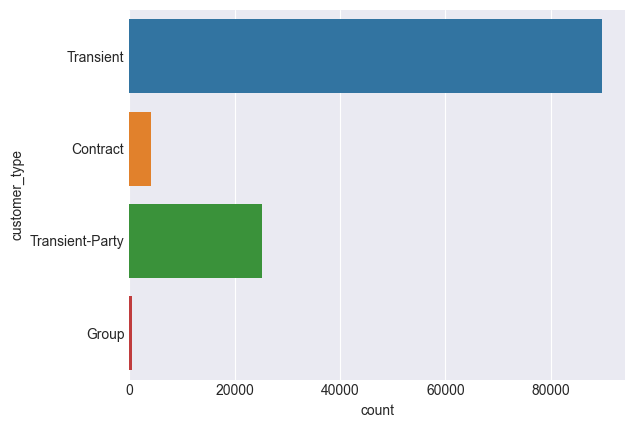

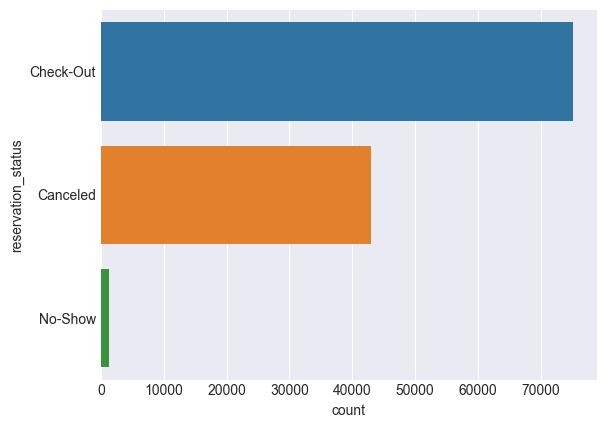

In [ ]:
import seaborn as sns

categorical = ['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type', 
'assigned_room_type','deposit_type','agent','company','customer_type','reservation_status']
for i in categorical: 
    sns.countplot(y=df[i])
    plt.show()


## e) Study the associations

1. Make crosstabs between the outcome 'is_canceled' and the categorical features. Use the option normalize='index' to get proportions, 
    1. Which customer_type cancels the most? 
    2. Which hotel has most cancellations?
    3. Which room type always cancels? How can you explain this?
    4. What do you notice for the feature 'reservation_status'. What will you do with this feature? Does this  have any consequences for other features?
2. Make a heat map for all continuous features    


In [115]:
for i in categorical: 
    print(pd.crosstab(df[i],df['is_canceled'], normalize='index'))


is_canceled         0         1
agent                          
1.0          0.265749  0.734251
2.0          0.790123  0.209877
3.0          0.422904  0.577096
4.0          0.340426  0.659574
5.0          0.548485  0.451515
...               ...       ...
510.0        1.000000  0.000000
526.0        0.900000  0.100000
527.0        1.000000  0.000000
531.0        0.323529  0.676471
535.0        1.000000  0.000000

[333 rows x 2 columns]
is_canceled         0         1
company                        
6.0          1.000000  0.000000
8.0          1.000000  0.000000
9.0          0.918919  0.081081
10.0         1.000000  0.000000
11.0         1.000000  0.000000
...               ...       ...
531.0        0.000000  1.000000
534.0        1.000000  0.000000
539.0        1.000000  0.000000
541.0        1.000000  0.000000
543.0        0.000000  1.000000

[352 rows x 2 columns]
is_canceled         0         1
country                        
ABW          1.000000  0.000000
AGO          0.433702  0

In [116]:
df.assigned_room_type.value_counts()


A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\2910816386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


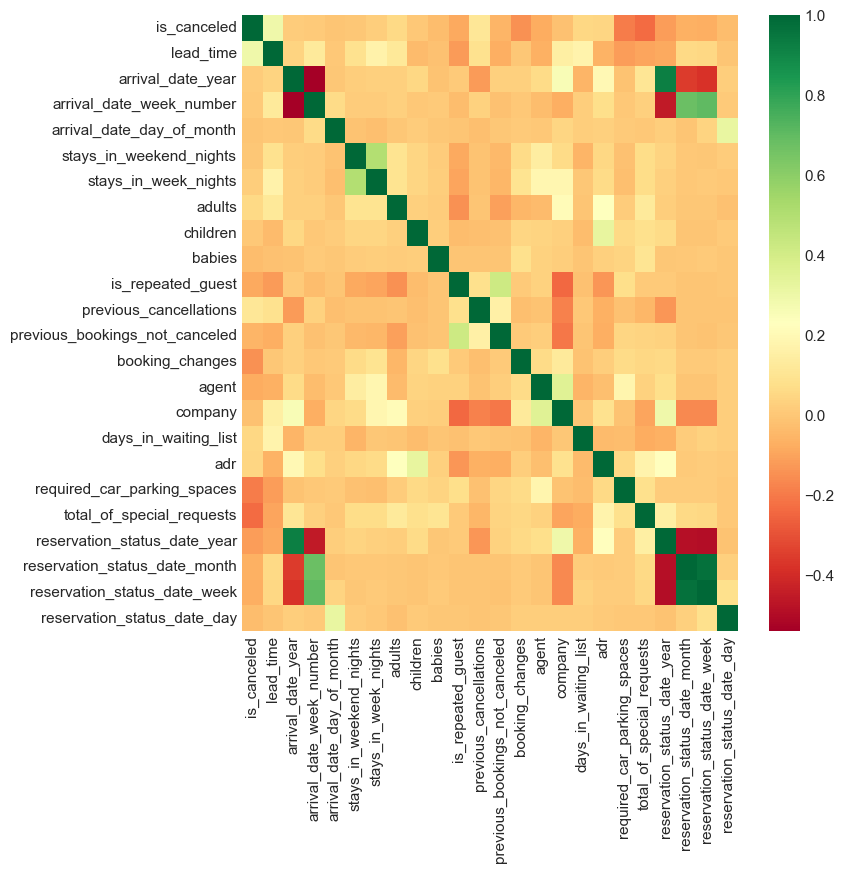

In [117]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, cmap='RdYlGn');

## 2. Data cleaning

In the data cleaning step, we will fix most of the issues that we noticed during the exploratory analysis. 

## a) Remove unwanted observations and features
1. Remove duplicated observations
2. Remove irrelevant observations (hint: for which hotel do you work?):
3. Remove irrelevant/leaky features (hint: what did you notice during the previous excercice?)


1. Remove duplicated observations

In [ ]:
df_no_dup = df.copy()
df_no_dup.drop_duplicates()   # Remove the duplicates
print(df_no_dup.shape)               # check the remaining number of observations


(119390, 32)


2. Remove irrelevant observations

In [ ]:
df_city = df_no_dup.copy()
df_city = df_no_dup[df_no_dup['hotel'] == 'City Hotel']
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

3. Remove irrelevant features

In [119]:
df_city = df_city.drop(['hotel','reservation_status','reservation_status_date_year', 'reservation_status_date_month',
                       'reservation_status_date_week', 'reservation_status_date_day'],1)
df_city.info()

C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\1782446497.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_city = df_city.drop(['hotel','reservation_status','reservation_status_date_year', 'reservation_status_date_month',


KeyError: "['reservation_status_date_year', 'reservation_status_date_month', 'reservation_status_date_week', 'reservation_status_date_day'] not found in axis"

## b) Fix structural errors

Unless you found any structural errors, you can skip this step.

## c) Deal with unwanted outliers
1. Do you need to remove any outliers?



## d) Handle missing data
1. Find out which features still have missing data now that we only have the observations of the city hotel.
2. Impute the missing values of the continuous feature(s).
3. Is it a good idea to flag the missigness here?
4. Appoint the missing values to an extra category 'Undefined'. You will have to define the features as categorical first.
    + Why 'Undefined' instead of the usual 'Missing?'
5. Check if all the missingness is gone    

1. Finding missingness

In [120]:
df_city.isnull().sum()[df_city.isnull().sum() != 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

2. continuous feature(s)


In [ ]:
df_imputed = df_city.copy()

# import Imputer 
from sklearn.impute import SimpleImputer

# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train the imputor on the dataset
mean_imputer = mean_imputer.fit(np.array(df_city['children']).reshape(-1, 1) )

# Apply the imputer to the dataset (This imputer can also be used on future datasets)
df_imputed['children'] = mean_imputer.transform(np.array(df_city['children']).reshape(-1, 1) )

In [121]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  float64
 2   lead_time                       119390 non-null  float64
 3   arrival_date_year               119390 non-null  float64
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  float64
 6   arrival_date_day_of_month       119390 non-null  float64
 7   stays_in_weekend_nights         119390 non-null  float64
 8   stays_in_week_nights            119390 non-null  float64
 9   adults                          119390 non-null  float64
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  float64
 12  meal            

4. Categorical features

In [ ]:
categorical = ['agent','company', 'country']


for col in categorical:
    df_imputed[col] = df_imputed[col].astype('category')
    df_imputed[col] = df_imputed[col].cat.add_categories('Undefined')
    df_imputed[col] = df_imputed[col].fillna('Undefined')
    df_imputed[col] = df_imputed[col].astype('object')


5. Check

In [122]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  float64
 2   lead_time                       119390 non-null  float64
 3   arrival_date_year               119390 non-null  float64
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  float64
 6   arrival_date_day_of_month       119390 non-null  float64
 7   stays_in_weekend_nights         119390 non-null  float64
 8   stays_in_week_nights            119390 non-null  float64
 9   adults                          119390 non-null  float64
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  float64
 12  meal            

## 3. Feature engineering


## a) Create new features

1. Create a new feature 'length_stays', by combining the information in 'stays_in_weekend_nights' and 'stays_in_week_nights'
2. Create a new feature 'total_previous_bookings'. Which features will you combine for this?


In [ ]:
df_imputed['length_stays'] = df_imputed['stays_in_weekend_nights'] + df_imputed['stays_in_week_nights']
df_imputed['total_previous_bookings'] = df_imputed['previous_bookings_not_canceled'] + df_imputed['previous_cancellations']

## b) Combine sparse classes

We had eleven categorical features with sparse classes.
1. Remake the barplots for these features.
2. combine the sparse classes
    + meal: combine 'FB', and 'HB' into 'FB/HB'
    + country: combine all countries with less than 1% of the total observations into 'Other'
    + market_segment: Combine 'Aviation', 'Corporate', 'Complementary', and 'Undefined' into 'Other'  
    + distribution_channel: Combine 'Corporate', 'GDS' and 'Undefined' into 'Other' 
    + reserved_room_type: Combine 'B', 'E', 'F', 'G','C','P'  into 'Other
    + assigned_room_type: Combine 'B', 'E', 'F','G','C','P' and 'K' into 'Other
    + deposit_type: combine 'Non Refund', and 'Refundable' into 'Deposit'
    + agent: combine all agents with less than 1% of the total observations into 'Other'
    + company: combine all companies with less than 1% of the total observations into 'Other'
    + customer_type: combine 'Contract' and 'Group' into 'Other'
 3. Check the changes by remaking the plots   



1. New plots

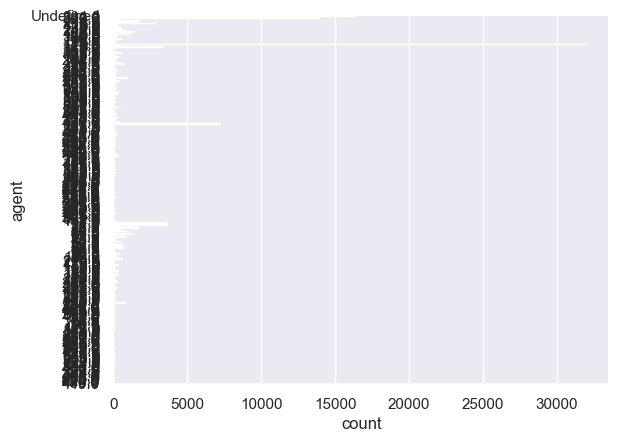

In [ ]:
df_imputed['agent'] = df_imputed['agent'].astype('object')
sns.set()
sns.countplot(y=df_imputed['agent'])
plt.show()

2. Combining sparse classes

In [85]:
df_sparse = df_imputed.copy()

# meal
df_sparse['meal'][df_sparse['meal'] == 'HB'] = 'HB/FB'
df_sparse['meal'][df_sparse['meal'] == 'HB'] = 'HB/FB'
df_sparse['meal'].value_counts()

 

C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\3991703162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['meal'][df_sparse['meal'] == 'HB'] = 'HB/FB'
C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\3991703162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['meal'][df_sparse['meal'] == 'HB'] = 'HB/FB'


BB           92310
HB/FB        14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
#country
threshold_percent = 1

series = pd.value_counts(df_sparse['country'])
mask = (series / series.sum() * 100).lt(threshold_percent)
df_sparse['country']= np.where(df_sparse['country'].isin(series[mask].index),'Other', df_sparse['country'])
df_sparse['country'].value_counts()

PRT      48590
Other    12221
GBR      12129
FRA      10415
ESP       8568
DEU       7287
ITA       3766
IRL       3375
BEL       2342
BRA       2224
NLD       2104
USA       2097
CHE       1730
CN        1279
AUT       1263
Name: country, dtype: int64

In [ ]:
# market_segment
df_sparse['market_segment'][df_sparse['market_segment'] == 'Complementary'] = 'Other'
df_sparse['market_segment'][df_sparse['market_segment'] == 'Aviation'] = 'Other'
df_sparse['market_segment'][df_sparse['market_segment'] == 'Undefined'] = 'Other'
df_sparse['market_segment'][df_sparse['market_segment'] == 'Corporate'] = 'Other'

C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\1088269068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['market_segment'][df_sparse['market_segment'] == 'Complementary'] = 'Other'
C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\1088269068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['market_segment'][df_sparse['market_segment'] == 'Aviation'] = 'Other'
C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\1088269068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
# distribution_channel
df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'Undefined'] = 'Other'
df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'Corporate'] = 'Other'
df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'GDS'] = 'Other'


C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\3010317746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'Undefined'] = 'Other'
C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\3010317746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'Corporate'] = 'Other'
C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\3010317746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [ ]:
# reserved_room_type 'B', 'E', 'F', 'G','C','P'
df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'B'] = 'Other'
df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'E'] = 'Other'
df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'F'] = 'Other'
df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'G'] = 'Other'
df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'C'] = 'Other'
df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'P'] = 'Other'

# assigned_room_type 'B', 'E', 'F','G','C','P' and 'K' 
df_sparse['assigned_room_type'][df_sparse['assigned_room_type'] == 'B'] = 'Other'
df_sparse['assigned_room_type'][df_sparse['assigned_room_type'] == 'E'] = 'Other'
df_sparse['assigned_room_type'][df_sparse['assigned_room_type'] == 'F'] = 'Other'
df_sparse['assigned_room_type'][df_sparse['assigned_room_type'] == 'G'] = 'Other'
df_sparse['assigned_room_type'][df_sparse['assigned_room_type'] == 'C'] = 'Other'
df_sparse['assigned_room_type'][df_sparse['assigned_room_type'] == 'P'] = 'Other'
df_sparse['assigned_room_type'][df_sparse['assigned_room_type'] == 'K'] = 'Other'

C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\3233076226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'B'] = 'Other'
C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\3233076226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['distribution_channel'][df_sparse['distribution_channel'] == 'E'] = 'Other'
C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\3233076226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
#deposit_type
df_sparse['deposit_type'][df_sparse['deposit_type'] == 'Non Refund'] = 'Deposit'
df_sparse['deposit_type'][df_sparse['deposit_type'] == 'Refundable'] = 'Deposit'

C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\701450989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['deposit_type'][df_sparse['deposit_type'] == 'Non Refund'] = 'Deposit'
C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\701450989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['deposit_type'][df_sparse['deposit_type'] == 'Refundable'] = 'Deposit'


In [ ]:
#agent
threshold_percent = 1

series = ...
mask = "other"
df_sparse['agent']= mask
df_sparse['agent'].value_counts()

: 

In [ ]:
#company company: combine all companies with less than 1% of the total observations into 'Other'
threshold_percent = 1

series = ...
mask = "other"
df_sparse['agent']= mask
df_sparse['agent'].value_counts()

: 

In [86]:
#Customer type     + customer_type: combine 'Contract' and 'Group' into 'Other'

df_sparse['customer_type'][df_sparse['customer_type'] == 'Contract'] = 'Other'
df_sparse['customer_type'][df_sparse['customer_type'] == 'Group'] = 'Other'
df_sparse['customer_type'].value_counts()

C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\359436964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['customer_type'][df_sparse['customer_type'] == 'Contract'] = 'Other'
C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\359436964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparse['customer_type'][df_sparse['customer_type'] == 'Group'] = 'Other'


Transient          89613
Transient-Party    25124
Other               4653
Name: customer_type, dtype: int64

3. Check

In [ ]:
...

: 

## c) Create dummy variables (categorical features)
1. Use one-hot-encoding for all categorical features.


In [87]:
df_sparse = df_sparse.drop(['country','agent','market_segment'],1)


for col in df_sparse:
    if df_sparse[col].dtype ==  'object':
        dummies = pd.get_dummies(df_sparse[col], dummy_na=False, prefix=col)  #create dummies
        df_sparse = pd.concat([df_sparse, dummies],axis=1)                   # add dummies to dataset
        df_sparse.drop(columns=[col], inplace=True)                           # delete original feature

C:\Users\Victo\AppData\Local\Temp\ipykernel_18060\3235624722.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_sparse = df_sparse.drop(['country','agent','market_segment'],1)


## d) Do log-transformation if necessary
1. Do log-transformations on the skewed features
    + Find out which features are numeric
    + But first, change the type of 'is_repeated_guest' to type 'category'
    + Calculate the skewness of all features
    + Keep the features with skewness larger than 0.75, get their index and take the log

In [92]:
# Change this feature to type 'category'
df_sparse['is_repeated_guest'] = df_sparse['is_repeated_guest'].astype('category')

# Select the features with type 'int64' and 'float64'
num_feat = df_sparse.select_dtypes(include=['int64', 'float64']).columns



In [93]:
from scipy.stats import skew

# calculate the skewness
skewed = df_sparse[num_feat].apply(lambda x: skew(x.dropna().astype(float)))

# Only keep features where skewness is larger than 0.75
skewed = skewed[skewed > 0.75]

# Get the indexes of these features
skewed = skewed.index

# Take the log
df_sparse[skewed] = np.log1p(df_sparse[skewed])

c:\Users\Victo\.virtualenvs\labo-ohwnIF3M\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


array([[<AxesSubplot: title={'center': 'is_canceled'}>,
        <AxesSubplot: title={'center': 'lead_time'}>,
        <AxesSubplot: title={'center': 'arrival_date_year'}>,
        <AxesSubplot: title={'center': 'arrival_date_week_number'}>],
       [<AxesSubplot: title={'center': 'arrival_date_day_of_month'}>,
        <AxesSubplot: title={'center': 'stays_in_weekend_nights'}>,
        <AxesSubplot: title={'center': 'stays_in_week_nights'}>,
        <AxesSubplot: title={'center': 'adults'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'babies'}>,
        <AxesSubplot: title={'center': 'previous_cancellations'}>,
        <AxesSubplot: title={'center': 'previous_bookings_not_canceled'}>],
       [<AxesSubplot: title={'center': 'booking_changes'}>,
        <AxesSubplot: title={'center': 'days_in_waiting_list'}>,
        <AxesSubplot: title={'center': 'adr'}>,
        <AxesSubplot: title={'center': 'required_car_parking_spaces'}>],
       [<A

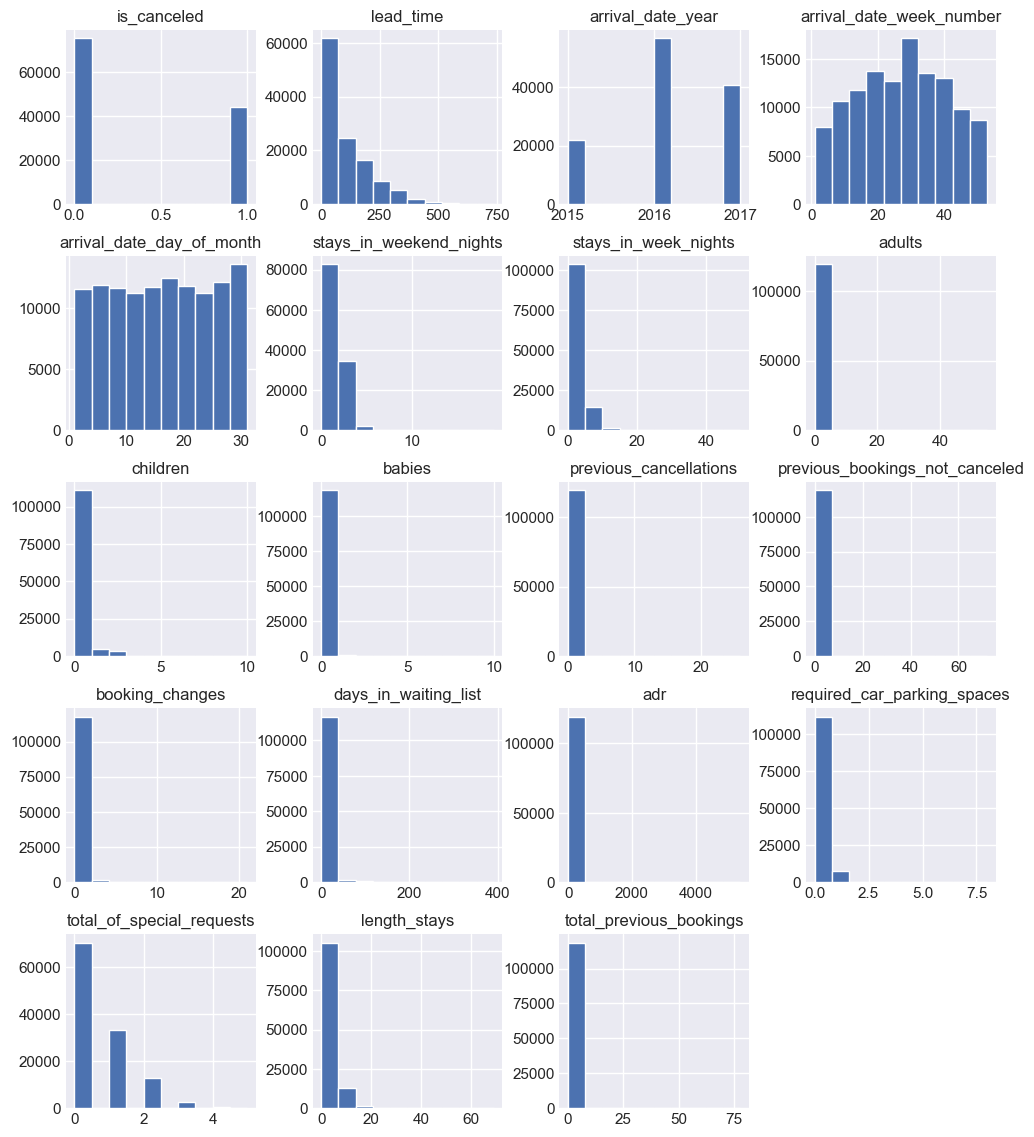

In [95]:
df_imputed[num_feat].hist( figsize = (12,14))

In [96]:
# Storing cleaned dataset to use in class 3
#df_sparse_save = df_sparse.copy()
#df_sparse_save = df_sparse_save.sample(n=10000)
#df_sparse_save.to_csv('hotel_bookings_cleaned.csv', index=False)

## e) Standardize continuous features
1. Standardize the continuous features using 
    + StandardScaler
    + MinMaxSCaler
    + RobustScaler

In [101]:
# standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_sparse[num_feat])
df_sparse[num_feat] = scaler.transform(df_sparse[num_feat])


#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_sparse[num_feat])
df_sparse[num_feat] = scaler.transform(df_sparse[num_feat])


#Robustscaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df_imputed[num_feat])
df_sparse[num_feat] = scaler.transform(df_sparse[num_feat])



Ok, now you know all the basics on how to clean a dataset. Let's try it on the data from your project!